In [ ]:
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.7 MB/s eta 0:00:00


In [ ]:
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pyLDAvis

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Importing File

df = pd.read_csv('/content/drive/MyDrive/Topic Modeling LDA Pilkada Jateng 2024/Data/dataset_instagram-hashtag-scraper_2024-07-16_13-59-33-189.csv')

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,caption,alt,timestamp,url,commentsCount,inputUrl,fullName,likesCount,ownerUsername,hashtags/0,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,Tahapan Pencalonan Pilkada 2024\n@ppk_purworej...,Photo by PPS Cangkreplor in Kabupaten Purworej...,2024-07-10T02:33:49.000Z,https://www.instagram.com/p/C9Ob6ofS3cx/,0,https://www.instagram.com/explore/tags/pilkada...,owner didnt open,8,pps_cangkreplor,pilbuppurworejo2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Terimakasih rekan-rekan pantarlih Desa Barukan...,Photo by PPK Kecamatan Manisrenggo 2024 on Jul...,2024-07-10T11:37:59.000Z,https://www.instagram.com/p/C9PaMOWy_Mk/,0,https://www.instagram.com/explore/tags/pilkada...,owner didnt open,23,ppk.manisrenggo,kpuklatenmencoklit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Repost @kpu.purworejo \nHai #temanpemilih ayo...,"Photo shared by PPS Binangun on July 09, 2024 ...",2024-07-10T00:13:28.000Z,https://www.instagram.com/p/C9OL2tDyoQq/,0,https://www.instagram.com/explore/tags/pilkada...,owner didnt open,11,pps.desa.binangun,temanpemilih,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Panitia Ad Hoc Pilkada 2024\n@ppk_purworejo\n#...,"Photo by PPS Cangkreplor on July 09, 2024. May...",2024-07-10T00:29:17.000Z,https://www.instagram.com/p/C9ONqkjyV1o/,1,https://www.instagram.com/explore/tags/pilkada...,owner didnt open,11,pps_cangkreplor,pilbuppurworejo2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"#TemanPemilih Rabu, 10 Juli 2024\nMonitoring P...","Photo by PPS Desa Sekarsuli on July 10, 2024. ...",2024-07-10T11:03:07.000Z,https://www.instagram.com/p/C9PWM7pvX_T/,0,https://www.instagram.com/explore/tags/pilkada...,owner didnt open,9,pps_ds.sekarsuli,TemanPemilih,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert all entries in the 'captionntent' column to strings
df['caption'] = df['caption'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#preprocessing
def removeStopword(str):
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)
#remove sentence which contains only one word
def removeSentence(str):
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''

    return str
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)

    return str
def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)

    return str

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:23: DeprecationWarning: invalid escape sequence '\S'
<>:29: DeprecationWarning: invalid escape sequence '\s'
<>:23: DeprecationWarning: invalid escape sequence '\S'
<>:29: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-11-467c44ec6b70>:23: DeprecationWarning: invalid escape sequence '\S'
  str = re.sub("\S*\d\S*", "", str).strip()
<ipython-input-11-467c44ec6b70>:29: DeprecationWarning: invalid escape sequence '\s'
  str = re.sub('[\s]+', ' ', str)


In [ ]:
df['caption'] = df['caption'].apply(preprocessing)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
#Create Bigram & Trigram Models
from gensim.models import Phrases

text = df['caption']
text_list =  [i.split() for i in text]

# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#build corpus | Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

#The function doc2bow converts document (a list of words) into the bag-of-words format
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


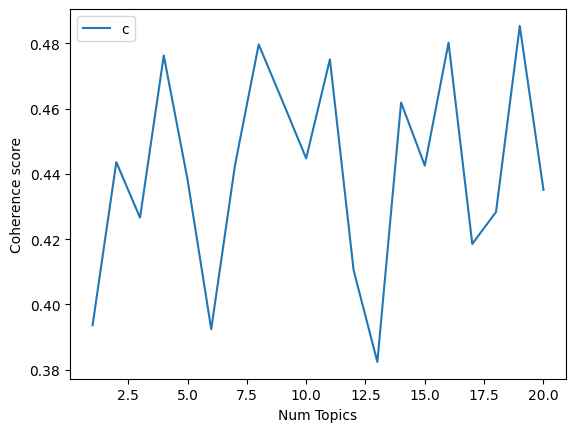

In [ ]:
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, iterations=50)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Example usage
start = 1
limit = 21
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, texts=text_list, start=start, limit=limit, step=step)

# Plotting coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.393591
Num Topics = 2  has Coherence Value of 0.443615
Num Topics = 3  has Coherence Value of 0.426589
Num Topics = 4  has Coherence Value of 0.476293
Num Topics = 5  has Coherence Value of 0.438334
Num Topics = 6  has Coherence Value of 0.392402
Num Topics = 7  has Coherence Value of 0.442611
Num Topics = 8  has Coherence Value of 0.479698
Num Topics = 9  has Coherence Value of 0.462349
Num Topics = 10  has Coherence Value of 0.444772
Num Topics = 11  has Coherence Value of 0.475129
Num Topics = 12  has Coherence Value of 0.410471
Num Topics = 13  has Coherence Value of 0.382361
Num Topics = 14  has Coherence Value of 0.461887
Num Topics = 15  has Coherence Value of 0.442557
Num Topics = 16  has Coherence Value of 0.480257
Num Topics = 17  has Coherence Value of 0.418521
Num Topics = 18  has Coherence Value of 0.428347
Num Topics = 19  has Coherence Value of 0.485378
Num Topics = 20  has Coherence Value of 0.435097


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.013*"kecamatan_banjarnegara" + 0.012*"pendaftaran_pantarlih" + 0.011*"banjarnegara" + 0.011*"data_pemilih" + 0.010*"ppk_purworejo" + 0.009*"pilkada_serentak" + 0.008*"kpubanjarnegara_ppkbanjarnegara" + 0.007*"banjarnegara_pemilukada" + 0.007*"petugas_pemutakhiran" + 0.006*"pemilih"
Topic: 1 Word: 0.012*"bupati_wakil" + 0.010*"ppk_purworejo" + 0.008*"bupati" + 0.008*"wakil_gubernur" + 0.008*"wakil" + 0.008*"kecamatan_banjarnegara" + 0.008*"banjarnegara" + 0.007*"pemilihan_gubernur" + 0.007*"gubernur" + 0.007*"purworejo"
Topic: 2 Word: 0.009*"pilkada_serentak" + 0.008*"ppk_purworejo" + 0.008*"halo_sobat" + 0.008*"pilgub_jateng" + 0.007*"desa_suroyudan" + 0.007*"kpubanjarnegara_ppkbanjarnegara" + 0.006*"desa_ampelsari" + 0.006*"desa_purwosari" + 0.006*"pendaftaran_pantarlih" + 0.006*"rapat_koordinasi"
Topic: 3 Word: 0.010*"pilkada_serentak" + 0.008*"sekretariat_pps" + 0.007*"kelurahan_semarang" + 0.007*"ppk_purworejo" + 0.007*"kpubanjarnegara_ppkbanjarnegara" + 0.006*"kec

In [ ]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, '/content/drive/MyDrive/data bang fahmi pilgub jateng/pilgub-jatim-lda-gensim.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.018724  0.046160       1        1  27.781666
2     -0.053170 -0.043379       2        1  25.404788
1      0.007948  0.022580       3        1  24.881139
3      0.063946 -0.025360       4        1  21.932407, topic_info=                        Term       Freq      Total Category  logprob  loglift
72            desa_suroyudan   5.000000   5.000000  Default  30.0000  30.0000
314               halo_sobat   7.000000   7.000000  Default  29.0000  29.0000
421            pilgub_jateng   6.000000   6.000000  Default  28.0000  28.0000
10              bupati_wakil  14.000000  14.000000  Default  27.0000  27.0000
74                 hai_haiii   4.000000   4.000000  Default  26.0000  26.0000
..                       ...        ...        ...      ...      ...      ...
205          ppkbanjarnegara   2.162578  10.087841   Topic4  -5.6252  -0.0228
707      